In [2]:
import geopandas
import contextily as ctx
import requests
import json
from datetime import datetime
import pandas as pd
import random

import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
plt.style.use('ggplot')

# Gather Datasets

### CTA Bus

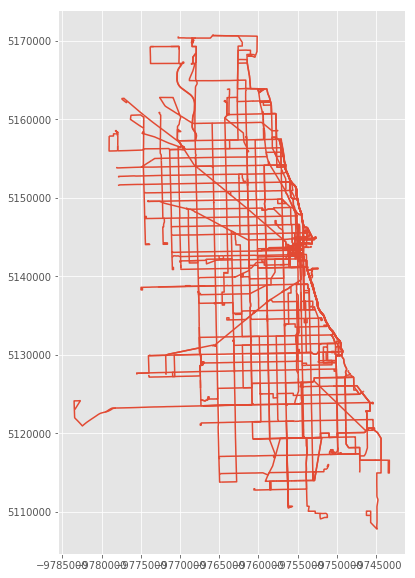

In [3]:
# Get route map
bus_routes = geopandas.read_file("/Users/lalevy/Documents/chipy/CTA_BusRoutes/CTA_BusRoutes.shp")
bus_routes = bus_routes.to_crs(epsg=3857)
bus_routes.plot(figsize=(10,10))

In [4]:
# Get ridership data
averages = {}

for route in bus_routes.ROUTE:
    url = f'https://data.cityofchicago.org/resource/dv3z-wsyd.json?route={route}'
    temp = pd.read_json(url)
    averages[route]=temp.rides.mean()

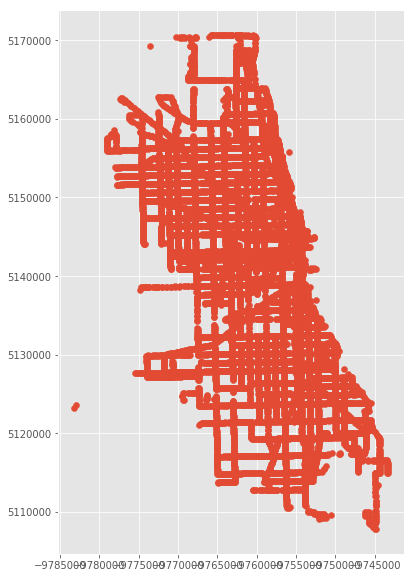

In [6]:
# Get stop locations
bus_stops = geopandas.read_file("/Users/lalevy/Documents/chipy/CTA_BusStops/CTA_BusStops.shp")
bus_stops = bus_stops.to_crs(epsg=3857)
bus_stops.plot(figsize=(10,10))

### CTA L

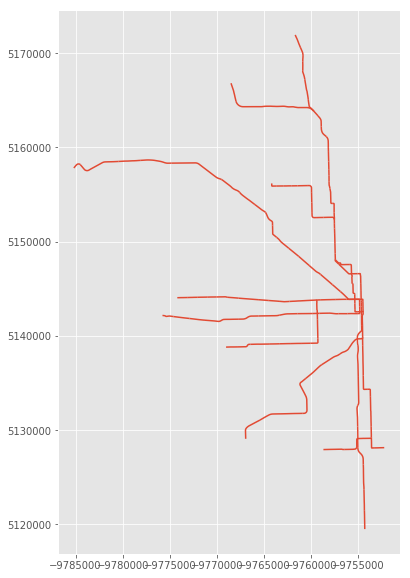

In [8]:
# Get rail line map
rail_lines = geopandas.read_file("/Users/lalevy/Documents/chipy/CTA_RailLines/CTA_RailLines.shp")
rail_lines = rail_lines.to_crs(epsg=3857)
rail_lines.plot(figsize=(10,10))

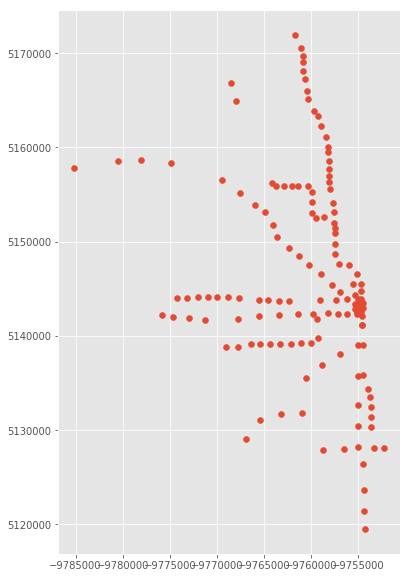

In [10]:
# Get station locations
rail_stations = geopandas.read_file("/Users/lalevy/Documents/chipy/CTA_RailStations/CTA_RailStations.shp")
rail_stations = rail_stations.to_crs(epsg=3857)
rail_stations.plot(figsize=(10,10))

In [11]:
rail_stations.head()

,OBJECTID,STATION_ID,LONGNAME,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry
0,2,1120,35-Bronzeville-IIT,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,POINT (-9754468.506051848 5135798.880605998)
1,4,760,Granville,Red Line,1119 W. Granville Avenue,1,0,1.167506e+06,1.941003e+06,40760,POINT (-9758177.761097327 5160030.428180639)
2,6,1210,Wellington,"Brown, Purple (Express)",945 W. Wellington Avenue,1,0,1.169286e+06,1.920014e+06,41210,POINT (-9757516.987586314 5151402.248952111)
3,8,140,Dempster-Skokie,Yellow Line,5001 W. Dempster Street,1,1,1.142190e+06,1.957320e+06,40140,POINT (-9768498.897573812 5166815.85577427)
4,11,370,Washington/Dearborn,Blue Line,19 N. Dearborn,0,0,1.175927e+06,1.900801e+06,40370,POINT (-9754864.645939562 5143494.076814955)


In [40]:
rail_stations.set_index('LONGNAME',inplace=True)

In [78]:
# Get ridership data
averages = {}

for station in rail_stations.STATION_ID[:10]:
    url = f'https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id={station}'
    print(station)
    try:
        temp = pd.read_json(url)
        averages[station]=temp.rides.mean()
        print('success' + ' url: ' + url)
    except:
        print('fail' + ' url: ' + url)

1120
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=1120
760
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=760
1210
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=1210
140
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=140
370
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=370
1480
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=1480
1440
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=1440
90
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=90
160
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=160
1490
fail url: https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id=1490


In [25]:
averages = {}

for station in rail_stations.STATION_ID[:10]:
    url = f'https://data.cityofchicago.org/resource/mh5w-x5kh.json?station_id={station}'
    print(station)
    temp = pd.read_json(url)
    if not temp.empty:
        averages[station]=temp.rides.mean()
        print('success' + ' url: ' + url)

1120
760
1210
140
370
1480
1440
90
160
1490


In [43]:
rail_stations['means'] = station_means

In [48]:
rail_stations['means'].isnull().sum()

31

In [49]:
rail_stations[rail_stations['means'].isnull()]

,OBJECTID,STATION_ID,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry,means
LONGNAME,,,,,,,,,,,
Western-Ravenswood,13,1480,Brown Line,4645 N. Western Avenue,1,0,1.159616e+06,1.930951e+06,41480,POINT (-9761439.458513474 5155925.204736182),NaN
Addison-Ravenswood,15,1440,Brown Line,1818 W. Addison Street,1,0,1.163414e+06,1.923975e+06,41440,POINT (-9759906.978915572 5153047.893086352),NaN
Damen-Ravenswood,17,90,Brown Line,4643 N. Damen Avenue,1,0,1.162299e+06,1.931030e+06,40090,POINT (-9760340.988773035 5155949.297709001),NaN
Cottage Grove,42,720,Green Line,800 E. 63rd Street,1,0,1.182667e+06,1.863374e+06,40720,POINT (-9752239.438221838 5128127.359868434),NaN
Pulaski-Congress,62,920,Blue Line (Congress),530 S. Pulaski Road,0,0,1.149759e+06,1.897221e+06,40920,POINT (-9765571.896737879 5142107.26586147),NaN
Harlem-Congress,64,980,Blue Line (Congress),701 S. Harlem Avenue,0,0,1.127608e+06,1.896929e+06,40980,POINT (-9774626.17244832 5142047.664809634),NaN
Kedzie-Homan,66,250,Blue Line (Congress),530 S. Kedzie Avenue,1,0,1.155108e+06,1.897455e+06,40250,POINT (-9763384.843368756 5142187.515077098),NaN
Kedzie-Douglas,80,1040,Pink,1944 S. Kedzie Avenue,1,0,1.155312e+06,1.890061e+06,41040,POINT (-9763323.579946052 5139153.895899483),NaN
Conservatory-Central Park,91,1670,Green Line (Lake),3631 W. Lake Street,1,0,1.152209e+06,1.901253e+06,41670,POINT (-9764558.655916937 5143754.239775496),NaN


In [31]:
url = 'https://data.cityofchicago.org/resource/mh5w-x5kh.json?$where=station_id>0'
all_rides = pd.read_json(url)
all_rides.head()

,date,daytype,rides,station_id,stationname
0,2004-10-09,A,1057,40850,Library
1,2010-06-18,W,1154,40780,Central Park
2,2001-10-30,W,2116,41500,Montrose-Brown
3,2006-10-26,W,0,40500,Washington/State
4,2010-07-07,W,9431,41090,Monroe/State


In [34]:
all_rides.station_id.unique()

array([40850, 40780, 41500, 40500, 41090, 40080, 40350, 40550, 40260,
       40200, 41490, 40920, 40360, 41330, 41200, 40420, 40670, 41240,
       40340, 40390, 41150, 40730, 40570, 40150, 41220, 41000, 40090,
       41130, 40160, 40820, 41050, 40210, 40010, 40130, 40960, 41320,
       40630, 40170, 40240, 41060, 41480, 41660, 40870, 40990, 40070,
       40400, 40470, 40750, 40700, 40440, 41290, 41030, 41380, 41460,
       40940, 41180, 41040, 41670, 40840, 41300, 40890, 40540, 40640,
       40230, 41210, 41080, 40710, 40770, 40190, 41250, 40280, 41230,
       40370, 41160, 41340, 41140, 40690, 40430, 40220, 41360, 40290,
       40970, 40460, 40720, 40480, 40530, 40980, 40560, 40900, 40510,
       40610, 40300, 40590, 40930, 41260, 40740, 40140, 40250, 41420,
       40880, 41070, 40100, 40760, 41120, 40520, 40310, 41430, 41350,
       40660, 41410, 40050, 40790, 40030, 40330, 41440, 40060, 41680,
       40020, 40810, 41020, 41400, 41270, 40040, 40180, 40580, 41010,
       40650, 40830,

In [39]:
station_means = all_rides.groupby('stationname').rides.mean()
print(station_means)

stationname
18th                     836.666667
35-Bronzeville-IIT      1649.333333
35th/Archer             2623.500000
43rd                     859.800000
47th-Dan Ryan           2542.875000
47th-South Elevated     1292.333333
51st                     875.000000
54th/Cermak             1441.000000
63rd-Dan Ryan           2522.571429
69th                    2248.500000
79th                    7211.833333
87th                    4752.166667
95th/Dan Ryan          12785.666667
Adams/Wabash            6136.400000
Addison-Brown           2273.200000
Addison-North Main      8276.625000
Addison-O'Hare          2135.333333
Argyle                  2538.285714
Armitage                3543.428571
Ashland-Lake            1569.250000
Ashland-Orange          1106.100000
Ashland/63rd            1336.142857
Austin-Forest Park      1814.000000
Austin-Lake             1876.400000
Belmont-North Main      9943.000000
Belmont-O'Hare          4577.800000
Berwyn                  2983.900000
Bryn Mawr       

In [17]:
#get all stations
rail_ridership = pd.read_csv("/Users/lalevy/Documents/chipy/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")
station_averages = rail_ridership.groupby('station_id').mean()

### Get Street Data From Open Street Maps

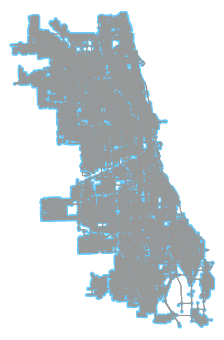

In [18]:
G = ox.graph_from_place('Chicago, Illinois, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

Let's look at a routing example by chosing two random CTA stations

In [19]:
start_index = random.randint(0,rail_stations.shape[0])
end_index = random.randint(0,rail_stations.shape[0])

In [20]:
start_x = rail_stations['POINT_X'][start_index]
start_y= rail_stations['POINT_Y'][start_index]

end_x = rail_stations['POINT_X'][end_index]
end_y= rail_stations['POINT_Y'][end_index]

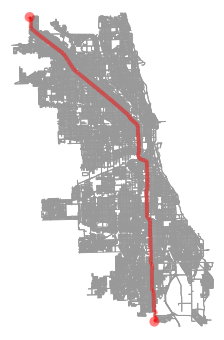

In [21]:
# get the nearest network node to each point
start_node = ox.get_nearest_node(G, (start_x, start_y))
end_node = ox.get_nearest_node(G, (end_x, end_y))

# find the route between these nodes then plot it
route = nx.shortest_path(G, start_node, end_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [79]:
rail_buffer = geopandas.GeoDataFrame(rail_stations['geometry'].buffer(100))
rail_buffer.crs = {'init' :'epsg:3857'}

In [80]:
rail_buffer.head()

,0
LONGNAME,
35-Bronzeville-IIT,POLYGON ((-9754368.506051848 5135798.880605998...
Granville,POLYGON ((-9758077.761097327 5160030.428180639...
Wellington,POLYGON ((-9757416.987586314 5151402.248952111...
Dempster-Skokie,"POLYGON ((-9768398.897573812 5166815.85577427,..."
Washington/Dearborn,POLYGON ((-9754764.645939562 5143494.076814955...


In [82]:
rail_buffer.columns=['geometry']

In [53]:
rail_stations[rail_stations['geometry'].buffer(100).contains(rail_stations['geometry'][0])]

,OBJECTID,STATION_ID,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,geometry,means
LONGNAME,,,,,,,,,,,
35-Bronzeville-IIT,2,1120,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,POINT (-9754468.506051848 5135798.880605998),1649.333333


In [89]:
rail_buffer.crs={'init': 'epsg:3857', 'no_defs': True}
rail_buffer = rail_buffer.reset_index()

In [114]:
geopandas.sjoin(rail_buffer,rail_stations,op="contains")

,station_name,geometry,index_right,OBJECTID,STATION_ID,LINES,ADDRESS,ADA,PKNRD,POINT_X,POINT_Y,GTFS,means
0,35-Bronzeville-IIT,POLYGON ((-9754368.506051848 5135798.880605998...,35-Bronzeville-IIT,2,1120,Green Line,16 E. 35th Street,1,0,1.177051e+06,1.882048e+06,41120,1649.333333
1,Granville,POLYGON ((-9758077.761097327 5160030.428180639...,Granville,4,760,Red Line,1119 W. Granville Avenue,1,0,1.167506e+06,1.941003e+06,40760,3679.900000
2,Wellington,POLYGON ((-9757416.987586314 5151402.248952111...,Wellington,6,1210,"Brown, Purple (Express)",945 W. Wellington Avenue,1,0,1.169286e+06,1.920014e+06,41210,1599.750000
3,Dempster-Skokie,"POLYGON ((-9768398.897573812 5166815.85577427,...",Dempster-Skokie,8,140,Yellow Line,5001 W. Dempster Street,1,1,1.142190e+06,1.957320e+06,40140,2100.500000
4,Washington/Dearborn,POLYGON ((-9754764.645939562 5143494.076814955...,Washington/Dearborn,11,370,Blue Line,19 N. Dearborn,0,0,1.175927e+06,1.900801e+06,40370,5721.375000
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,Western-Ravenswood,13,1480,Brown Line,4645 N. Western Avenue,1,0,1.159616e+06,1.930951e+06,41480,NaN
6,Addison-Ravenswood,POLYGON ((-9759806.978915572 5153047.893086352...,Addison-Ravenswood,15,1440,Brown Line,1818 W. Addison Street,1,0,1.163414e+06,1.923975e+06,41440,NaN
7,Damen-Ravenswood,POLYGON ((-9760240.988773035 5155949.297709001...,Damen-Ravenswood,17,90,Brown Line,4643 N. Damen Avenue,1,0,1.162299e+06,1.931030e+06,40090,NaN
8,LaSalle/Van Buren,POLYGON ((-9755019.987772578 5142550.782157139...,LaSalle/Van Buren,19,160,"Brown, Orange, Pink, Purple (Express)",121 W. Van Buren Street,0,0,1.175321e+06,1.898497e+06,40160,2959.571429
9,Harrison,POLYGON ((-9754546.354880998 5142129.768453573...,Harrison,24,1490,Red Line,608 S. State Street,0,0,1.176489e+06,1.897480e+06,41490,2764.000000


In [116]:
geopandas.sjoin(rail_buffer,bus_stops)

,station_name,geometry,index_right,OBJECTID,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,STATUS,PUBLIC_NAM,POINT_X,POINT_Y
0,35-Bronzeville-IIT,POLYGON ((-9754368.506051848 5135798.880605998...,7148,7400,18238.0,STATE,35TH STREET,NB,FS,31,None,CHICAGO,1,State & 35th Street,-87.626416,41.831174
0,35-Bronzeville-IIT,POLYGON ((-9754368.506051848 5135798.880605998...,9472,9918,7635.0,35TH STREET,STATE,WB,NS,35,None,CHICAGO,1,35th Street & State (Green Line),-87.625936,41.831183
4,Washington/Dearborn,POLYGON ((-9754764.645939562 5143494.076814955...,6566,6630,14227.0,WASHINGTON,STATE,EB,NS,N22,"N22,N62",CHICAGO,1,Washington & State,-87.628748,41.883132
4,Washington/Dearborn,POLYGON ((-9754764.645939562 5143494.076814955...,6992,7118,18122.0,WASHINGTON,CLARK/DEARBORN,EB,MB,"J14,19,20,56,60,124,157","N20,N60",CHICAGO,1,Washington & Clark/Dearborn,-87.630196,41.883147
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,1240,864,1483.0,WESTERN,LELAND/BROWN STATION,WB,TERM,11,None,CHICAGO,1,Western Brown Line Station,-87.688552,41.966052
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,7740,10434,1662.0,WESTERN,LELAND/BROWN STATION,WB,TERM,"11,49B",None,CHICAGO,1,Western Brown Line Station,-87.688561,41.966111
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,7007,7133,18155.0,WESTERN,WESTERN BROWN LINE STATION,NB,MB,"49,X49",N49,CHICAGO,1,Western Brown Line Station,-87.688716,41.966296
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,9711,9152,8184.0,WESTERN,LELAND,SB,FS,"49,X49",N49,CHICAGO,1,Western & Leland (Brown Line),-87.688987,41.966610
5,Western-Ravenswood,POLYGON ((-9761339.458513474 5155925.204736182...,1974,1913,1375.0,LELAND,WESTERN,EB,FS,"11,49B",N49,CHICAGO,1,Leland & Western (Brown Line),-87.688363,41.966632
6,Addison-Ravenswood,POLYGON ((-9759806.978915572 5153047.893086352...,1049,1050,12533.0,ADDISON,BROWN LINE STATION,EB,MB,152,None,CHICAGO,1,Addison Brown Line Station,-87.674648,41.946842
